In [6]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns  

In [7]:
def ROC(model):
    # Getting the probabilities for each class.
    y_prob = model.predict_proba(x_test)

    # Compute ROC curve and ROC area for each class.
    plt.figure(figsize=(5, 5))

    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    # Plotting ROC curve.
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.25, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - Class ')
    plt.legend(loc="lower right")

    plt.savefig('roc_dt.png', dpi=600)
    plt.show()
    
def ConfussionMatrix(predict):
    # Plot the confusion matrix.
    fig = plt.figure(figsize=(5,5))
    mat = confusion_matrix(y_test, predict)
    sns.set()
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.savefig('confusion_matrix_dt.png', dpi=600)
    plt.show()
    
def decision_boundary(model):
    # Step size in the mesh.
    h = .02 

    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    plt.figure(figsize=(5, 5))
    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points.
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.title("2-Class classification")

    plt.savefig('decision_boundary_dt.png', dpi=600)
    plt.show()

In [8]:
# Define the number of examples.
N = 500
# Create the dataset.
x, y = make_moons(n_samples = N, noise = 0.3, random_state=42)

#b)
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)

a)


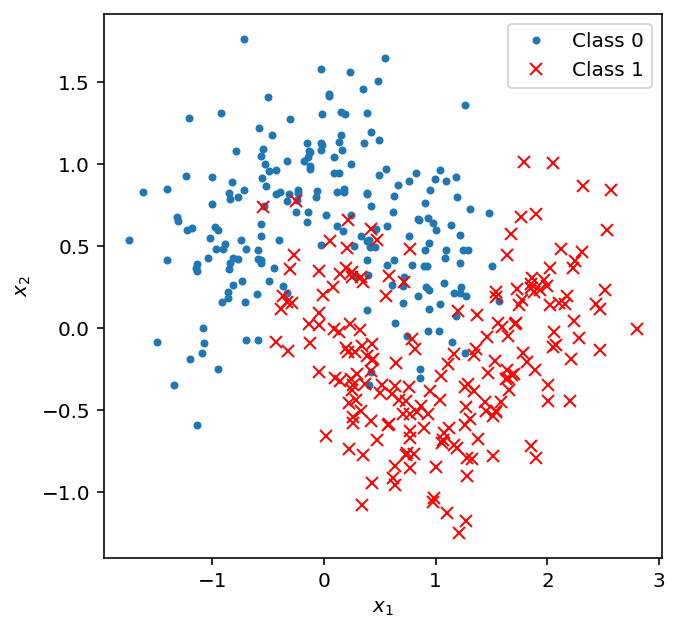

In [9]:
print('a)')
idx0 = np.argwhere(y_train == 0)
idx1 = np.argwhere(y_train == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x_train[idx0,0], x_train[idx0,1], '.', label='Class 0')
plt.plot(x_train[idx1,0], x_train[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('distribution_of_classes', dpi=600)
plt.show()

In [10]:
#c)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('d) Accuracy of model is:', accuracy_score(y_test, y_pred)*100, '%')

d) Accuracy of model is: 82.0 %


In [11]:
#e)
clf1 = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
clf1.fit(x_train, y_train)
y_pred1 = clf1.predict(x_test)

print('f) Accuracy of model is:', accuracy_score(y_test, y_pred1)*100, '%')

f) Accuracy of model is: 90.0 %


## Matriz de confusão

DecisionTreeClassifier


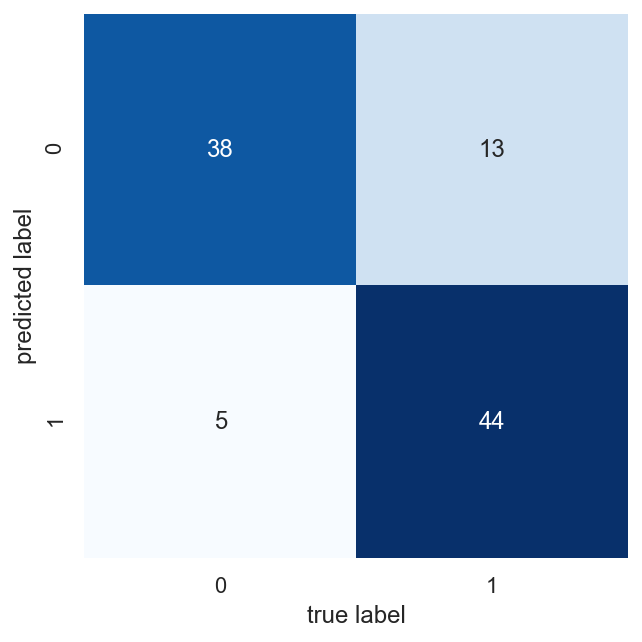

BaggingClassifier


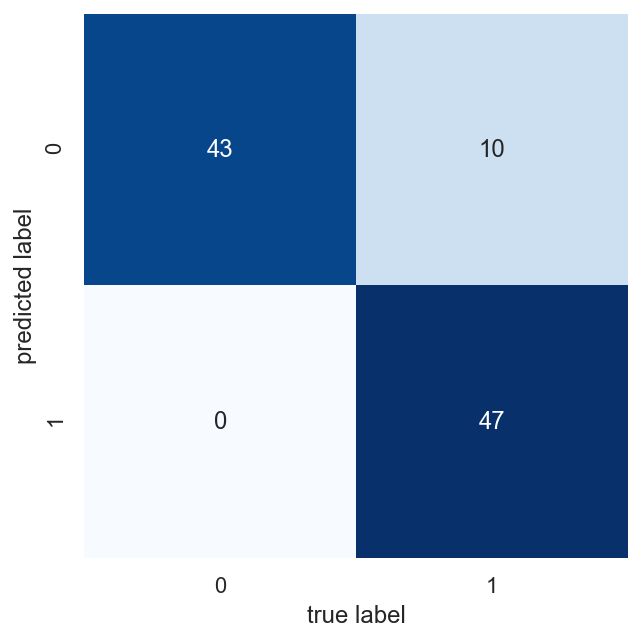

In [12]:
print('DecisionTreeClassifier')
CM_DecisionTreeClassifier = ConfussionMatrix(y_pred)
print('BaggingClassifier')
CM_BaggingClassifier = ConfussionMatrix(y_pred1)

## A fronteira de decisão

DecisionTreeClassifier


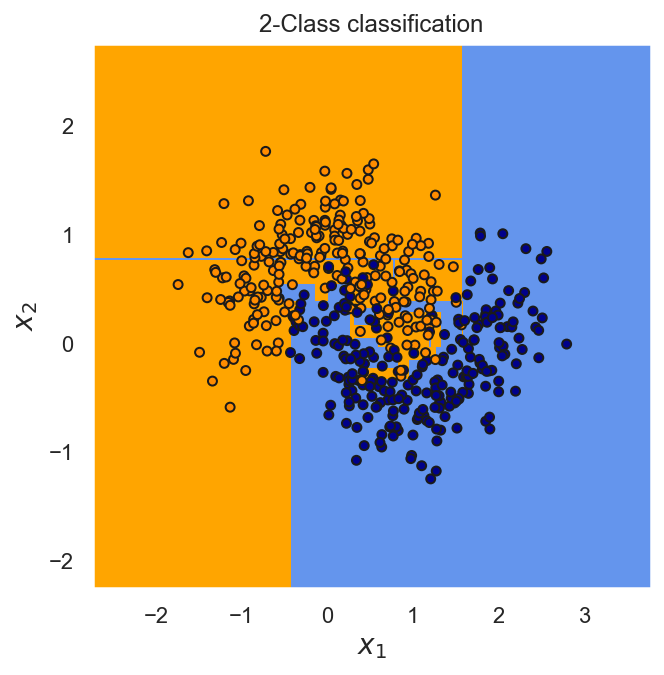

BaggingClassifier


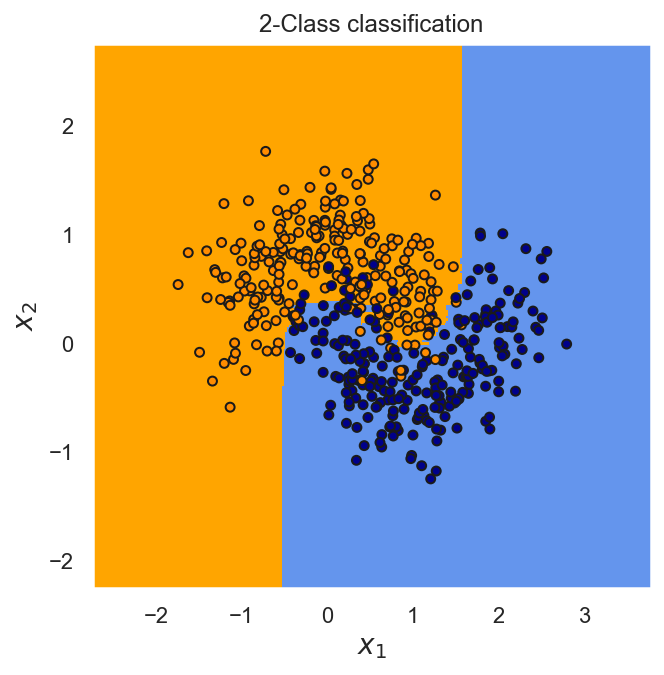

In [13]:
print('DecisionTreeClassifier')
decision_DecisionTreeClassifier = decision_boundary(clf)
print('BaggingClassifier')
decision_BaggingClassifier = decision_boundary(clf1)

## A curva ROC

DecisionTreeClassifier


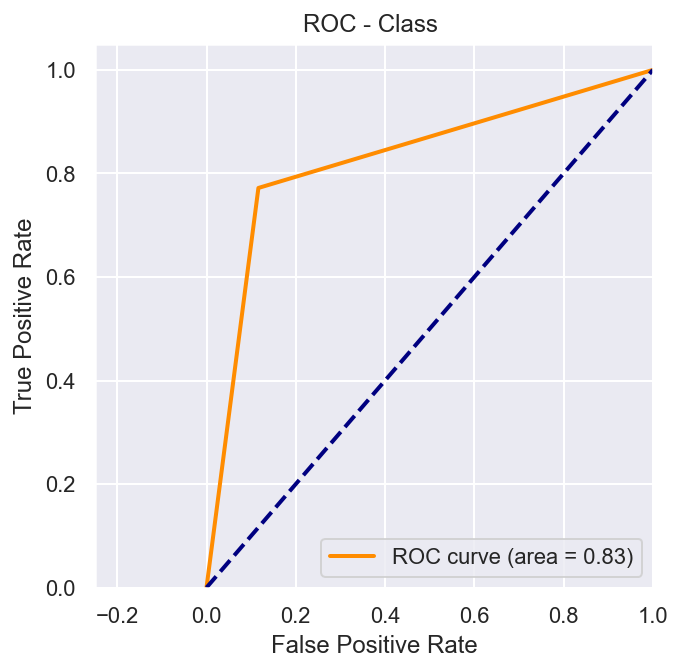

BaggingClassifier


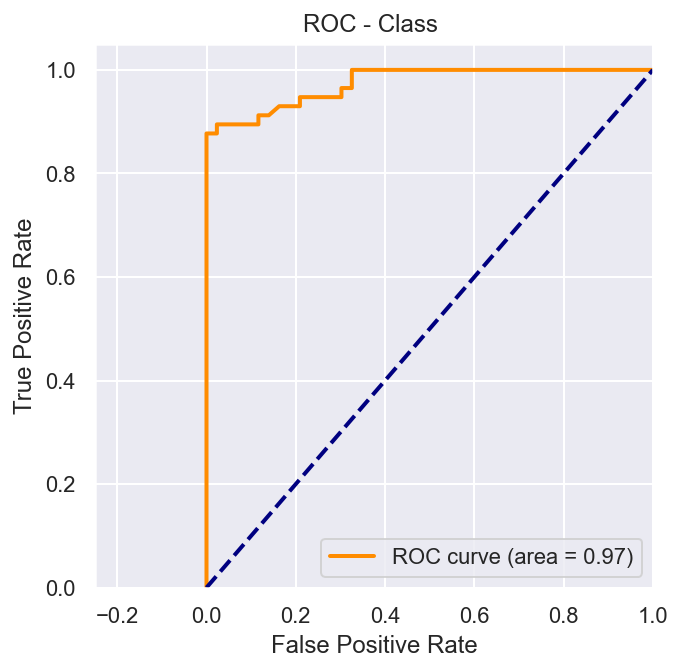

In [14]:
print('DecisionTreeClassifier')
ROC_DecisionTreeClassifier = ROC(clf)
print('BaggingClassifier')
ROC_BaggingClassifier = ROC(clf1)

## As previsões do Bagging se generalizarão muito melhor do que as previsões da DecisionTree (comete aproximadamente o mesmo número de erros no conjunto de treinamento, mas o limite da decisão é menos irregular). Isto é devido a que o Bagging apresenta um pouco mais de diversidade nos subconjuntos nos quais cada preditor é treinado, de modo que os preditores acabam sendo menos correlacionados para que a variação do conjunto seja reduzida.
